# Questionaires Descriptive Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import defaultdict
from IPython.display import display
from scipy import stats


In [2]:
conditions =["NoAvatar", "Normal", "Small", "Large"]
questions = {
        
         1: "It felt like the virtual body was my body." ,
         2: "It felt like the virtual body parts were my body parts." ,
         3: "The virtual body felt like a human body." ,
         4 :"It felt like the virtual body belonged to me." ,
        
         5: "The movements of the virtual body felt like they were my movements." ,
         6: "I felt like I was controlling the movements of the virtual body." ,
         7: "I felt like I was causing the movements of the virtual body." ,
         8: "The movements of the virtual body were in sync with my own movements." ,
    
         9: "I felt like the form or appearance of my own body had changed." ,
         10: "I felt like the weight of my own body had changed." ,
         11: "I felt like the size (height) of my own body had changed." ,
         12: "I felt like the width of my own body had changed." ,

    }
participants = ["13","14", "15", "08", "09", "10", "11", "12","16", "17"]

demographic_labels = ["Gender", "Age", "Height", "Weight"]
vr_labels = ["VR Experience","VR Usage","First Person Video Games", "Motion Sickness"]

In [3]:
#inverted , which is needed for some of the presence quetsionaires ( 8-, since  a likert scale of 7 was used)
def invert(d):
    return 8-d

## Read data of all presence and embodiment questionaires

In [4]:
embodi_data = {}
for c in conditions:
    temp = []    
    for p in participants:
             d = pd.read_csv("C:/Users/LauflaborVR2/GS-MT_Test/data/" + p + c + ".csv", names= ["Question", "Value"])
             temp.append(d)
    embodi_data[c] = temp

In [5]:
soci_data = pd.read_csv("C:/Users/LauflaborVR2/GS-MT_Test/Data/main_presence_questionaire.csv")

In [6]:
# export height and weight data
heights = soci_data["Height"]
weights = soci_data["Weight"]
weights.to_csv("weights.csv", index= False)
heights.to_csv("heights.csv", index= False)

### Embodiment Analysis

In [7]:
#sort the data regarding their factors and conditions
small = defaultdict(list)
large =defaultdict(list)
normal = defaultdict(list)
noAvatar = defaultdict(list)
for p in range(len(participants)):
        small["Ownership"].append(embodi_data["Small"][p].loc[embodi_data["Small"][p]["Question"]<5]["Value"].sum(axis=0)/4)
        small["Agency"].append(embodi_data["Small"][p].loc[(embodi_data["Small"][p]["Question"] > 4) & (embodi_data["Small"][p]["Question"]<9) ]["Value"].sum(axis=0)/4)
        small["Change"].append(embodi_data["Small"][p].loc[embodi_data["Small"][p]["Question"]>8]["Value"].sum(axis=0)/4)
        large["Ownership"].append(embodi_data["Large"][p].loc[embodi_data["Large"][p]["Question"]<5]["Value"].sum(axis=0)/4)
        large["Agency"].append(embodi_data["Large"][p].loc[(embodi_data["Large"][p]["Question"] > 4) & (embodi_data["Large"][p]["Question"]<9) ]["Value"].sum(axis=0)/4)
        large["Change"].append(embodi_data["Large"][p].loc[embodi_data["Large"][p]["Question"]>8]["Value"].sum(axis=0)/4)
        normal["Ownership"].append(embodi_data["Normal"][p].loc[embodi_data["Normal"][p]["Question"]<5]["Value"].sum(axis=0)/4)
        normal["Agency"].append(embodi_data["Normal"][p].loc[(embodi_data["Normal"][p]["Question"] > 4) & (embodi_data["Normal"][p]["Question"]<9) ]["Value"].sum(axis=0)/4)
        normal["Change"].append(embodi_data["Normal"][p].loc[embodi_data["Normal"][p]["Question"]>8]["Value"].sum(axis=0)/4)
        noAvatar["Ownership"].append(embodi_data["NoAvatar"][p].loc[embodi_data["NoAvatar"][p]["Question"]<5]["Value"].sum(axis=0)/4)
        noAvatar["Agency"].append(embodi_data["NoAvatar"][p].loc[(embodi_data["NoAvatar"][p]["Question"] > 4) & (embodi_data["NoAvatar"][p]["Question"]<9) ]["Value"].sum(axis=0)/4)
        noAvatar["Change"].append(embodi_data["NoAvatar"][p].loc[embodi_data["NoAvatar"][p]["Question"]>8]["Value"].sum(axis=0)/4)
dicts = [noAvatar, normal, small, large ]
keys = small.keys()

In [8]:
x = embodi_data["Normal"]
all_values = [df["Value"] for df in x]

stat, p_value = stats.shapiro(all_values )
print("Shapiro-Wilk-Test:", "p-Wert =", p_value)
## deutet auf nicht normalverteilt hin!

Shapiro-Wilk-Test: p-Wert = 7.993591664626354e-07


In [9]:
values_list = []

for condition in embodi_data.values():
    # Extrahiere die 'Value'-Spalte jedes DataFrames in der Liste
    condition_values = [df.loc[df["Question"]>8]['Value'].mean() for df in condition]  # Annahme: Es gibt nur eine Zeile je DataFrame
    values_list.append(condition_values)
values_list

[[4.25, 3.5, 1.0, 2.25, 2.0, 1.0, 4.25, 3.0, 1.5, 1.0],
 [1.25, 2.75, 1.0, 4.25, 4.5, 1.0, 4.75, 5.0, 1.0, 2.5],
 [2.25, 4.25, 4.25, 3.0, 7.0, 1.0, 4.25, 4.5, 2.5, 4.5],
 [4.75, 3.0, 2.5, 5.0, 5.75, 1.0, 4.75, 5.75, 2.0, 5.0]]

In [10]:


# Friedman-Test
stat, p = stats.friedmanchisquare(*values_list)
print("Friedman-Test Statistik:", stat)
print("p-Wert:", p)

Friedman-Test Statistik: 10.793103448275847
p-Wert: 0.012898903044113823


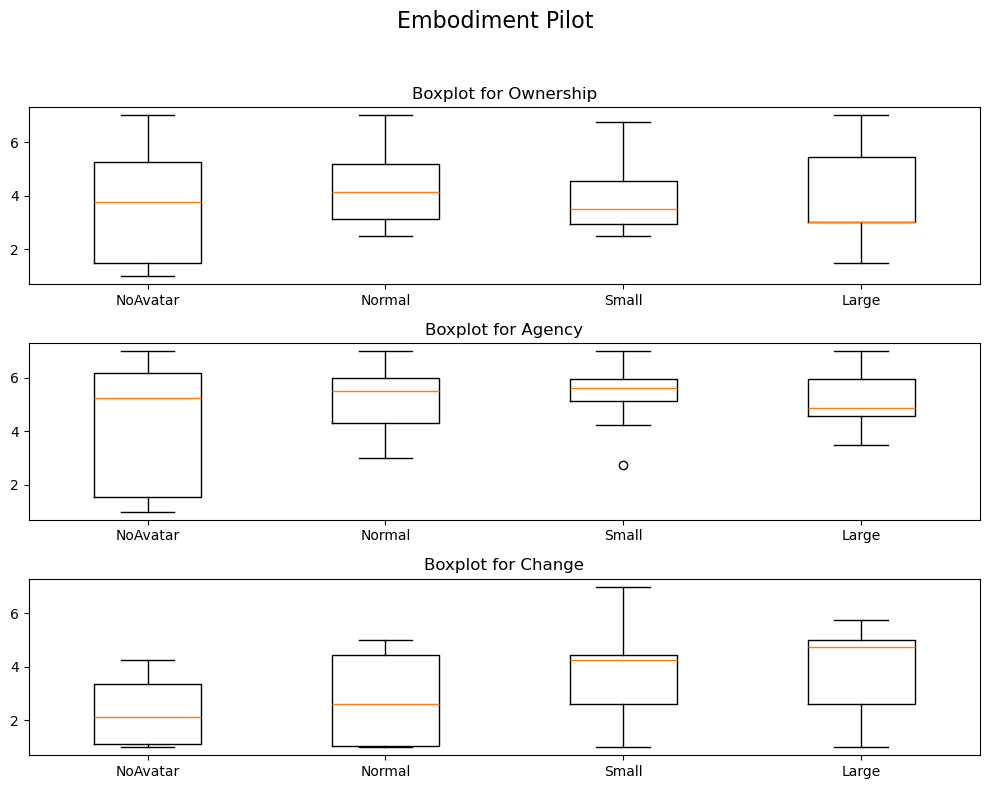

In [11]:
fig, axes = plt.subplots(nrows=len(keys), ncols=1, figsize=(10, 8))
for i, key in enumerate(keys):
    # Collect data for the current key from all defaultdicts
    dat = [d[key] for d in dicts]
    # Flatten the list of lists and add a label for each defaultdict
    data_flat = [item for sublist in dat for item in sublist]
    labels = conditions
    
    # Create a boxplot
    axes[i].boxplot(dat)
    axes[i].set_title(f'Boxplot for {key}')
    axes[i].set_xticklabels([conditions[j] for j in range(len(dicts))])

# Set overall title and show plot
fig.suptitle('Embodiment Pilot', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Presence Analysis

In [13]:
demo_data = soci_data[demographic_labels]
vr_data = soci_data[vr_labels]
ipq_data = soci_data.drop(demographic_labels + vr_labels, axis= 1)


In [14]:
numeric_summary = demo_data.describe().loc[["mean", "std"]]
categorical_summary = demo_data.select_dtypes(include=['object']).apply(pd.Series.value_counts)
display(numeric_summary)

,Gender,Age,Height,Weight
mean,1.0,24.600000,182.300000,76.300000
std,0.0,4.376706,5.498485,12.763228


In [51]:
ipq11 = ipq_data.drop( "VPID", axis=1)
ipq11[["Presence 6: How real did the virtual world seem to you?","Presence 7: How aware were you of the real world surrounding while navigating in the virtual world? (i.e. sounds, room temperature, other people, etc.)?" ]]= ipq11[["Presence 6: How real did the virtual world seem to you?","Presence 7: How aware were you of the real world surrounding while navigating in the virtual world? (i.e. sounds, room temperature, other people, etc.)?" ]].map(invert)
display(ipq11.describe().loc[["mean", "std"]].mean(axis=1))


mean    4.042857
std     1.351169
dtype: float64